### Title: Term Project Milestone_2
### Author: Jerock Kalala
### Date: November 11 2022
### Professor: David Kinney
### Connecting to an API/Pulling in the Data and Cleaning/Formatting

##### Perform at least 5 data transformation and/or cleansing steps to your API data.
##### Examples:
##### 1. Replace Headers
##### 2. Format data into a more readable format
##### 3. Identify outliers and bad data
##### 4. Find duplicates
##### 5. Fix casing or inconsistent values
##### 6. Conduct Fuzzy Matching
##### 7. Add data

In [176]:
import json
import requests
import pandas as pd


response = requests.get('https://api.covid19api.com/summary')
print(response)

<Response [200]>


In [177]:
data = response.json()
data

{'ID': '37b087ec-3dab-4da4-98a8-be29405b8e95',
 'Message': '',
 'Global': {'NewConfirmed': 416540,
  'TotalConfirmed': 631834247,
  'NewDeaths': 1166,
  'TotalDeaths': 6597158,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2022-11-11T23:58:26.326Z'},
 'Countries': [{'ID': 'c6360eed-451a-4f4c-b367-0eae35fe6294',
   'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 113,
   'TotalConfirmed': 203942,
   'NewDeaths': 1,
   'TotalDeaths': 7829,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2022-11-11T23:58:26.326Z',
   'Premium': {}},
  {'ID': '3a1a8e72-a1e3-4a2e-a176-b796949f1162',
   'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 13,
   'TotalConfirmed': 333071,
   'NewDeaths': 0,
   'TotalDeaths': 3593,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2022-11-11T23:58:26.326Z',
   'Premium': {}},
  {'ID': '6ab434b3-a910-4f14-ab29-4b8892947662',
   'Country': 'Algeria',
   'Co

In [178]:
with open("E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Term_Project\\surcovid.json") as url:
    d = json.load(url)

In [179]:
df=pd.DataFrame(columns=["ID", "Country", "CountryCode", " Slug",
                             "NewConfirmed", "TotalConfirmed", "NewDeaths", "TotalDeaths",
                             "NewRecovered", "TotalRecovered", "Date", "Premium"])

In [180]:
for i in range (0, len(d)):
    currentItem = d[i]
    df.loc[i]= [d[i]["ID"], d[i]["Country"],d[i]["CountryCode"], d[i]["Slug"],d[i]["NewConfirmed"],
                d[i]["TotalConfirmed"], d[i]["NewDeaths"], d[i]["TotalDeaths"], d[i]["NewRecovered"], d[i]["TotalRecovered"],
                d[i]["Date"], d[i]["Premium"]]


In [181]:
df.head()

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,b515b09b-0db9-402e-bbd6-c01fe6eb519c,Afghanistan,AF,afghanistan,122,199310,0,7800,0,0,2022-10-02T23:59:03.879Z,{}
1,11794790-4be5-49f7-bdb9-f210a5e87810,Albania,AL,albania,42,332263,0,3589,0,0,2022-10-02T23:59:03.879Z,{}
2,2ed212d0-a2f0-4e63-b01a-11d1d1602b83,Algeria,DZ,algeria,3,270676,0,6879,0,0,2022-10-02T23:59:03.879Z,{}
3,c8bba0e5-d340-4b98-b526-ce660be74700,Andorra,AD,andorra,0,46227,0,155,0,0,2022-10-02T23:59:03.879Z,{}
4,cac99df7-00f0-41df-8616-43739090cca6,Angola,AO,angola,0,103131,0,1917,0,0,2022-10-02T23:59:03.879Z,{}


1. cheking for missing value

In [182]:

df.isnull()

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
192,False,False,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,False,False
194,False,False,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,False,False


2. Select important columns by dropping less important ones

In [183]:

dfs = (df.drop(['ID', 'NewDeaths', 'NewRecovered', 'Date', 'Premium', ' Slug' ], axis=1))
dfs.head()

,Country,CountryCode,NewConfirmed,TotalConfirmed,TotalDeaths,TotalRecovered
0,Afghanistan,AF,122,199310,7800,0
1,Albania,AL,42,332263,3589,0
2,Algeria,DZ,3,270676,6879,0
3,Andorra,AD,0,46227,155,0
4,Angola,AO,0,103131,1917,0


3. Change headers

In [184]:
dfs= (dfs.rename(columns={'CountryCode':'Country Code', 'NewConfirmed': 'New Cases', 'TotalConfirmed':'TotalCases',
                    'TotalDeaths':'Deaths', 'TotalRecovered':'Total Recovered'}))

4. checking for duplicate values and fix it if any

In [185]:
print(dfs.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
192    False
193    False
194    False
195    False
196    False
Length: 197, dtype: bool


5. Identify Outliers using a boxplot

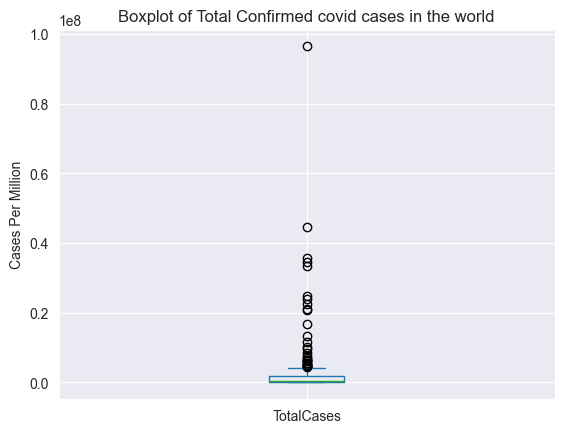

In [186]:
import matplotlib.pyplot as plt #import important library

dfs.TotalCases.plot(kind='box', title='Boxplot of Total Confirmed covid cases in the world')
plt.ylabel('Cases Per Million')
plt.grid("True")

In [187]:
# Let's find Position of the Outlier

import numpy as np #import important library

print(np.where(dfs['TotalCases']>80000000))

(array([188], dtype=int64),)


In [188]:
#Let's find what country is it, and the total of it's confirmed cases

print("The outlier is: \n", dfs.iloc[[188], [0,3]])

The outlier is: 
                       Country  TotalCases
188  United States of America    96392543


6. Add data br creating a new column "Observation" based upon the number of Total confirmed cases in each country

In [189]:
#Let
tmp =[]
for i in dfs['TotalCases']:
   if i < 80000:
      tmp.append('Green')
   elif i <= 8000000:
      tmp.append('Yellow')
   elif i <= 800000000:
      tmp.append('Red')
   else:
      tmp.append('Emergency')
dfs['Observation'] = tmp


In [190]:
dfs

,Country,Country Code,New Cases,TotalCases,Deaths,Total Recovered,Observation
0,Afghanistan,AF,122,199310,7800,0,Yellow
1,Albania,AL,42,332263,3589,0,Yellow
2,Algeria,DZ,3,270676,6879,0,Yellow
3,Andorra,AD,0,46227,155,0,Green
4,Angola,AO,0,103131,1917,0,Yellow
...,...,...,...,...,...,...,...
192,Venezuela (Bolivarian Republic),VE,57,544860,5816,0,Yellow
193,Viet Nam,VN,672,11480028,43149,0,Red
194,Yemen,YE,0,11935,2157,0,Green
195,Zambia,ZM,18,333549,4017,0,Yellow


In [175]:
#Count how many Countries are in RED

print(dfs.query('Observation == "Red"')[['Country']].count())

Country    16
dtype: int64
